In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as ticker

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/gdrive')



PATH = "/gdrive/My\ Drive/Colab\ Notebooks/"
!ls {PATH}

In [3]:
df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/covid19 usa.csv")
df.tail()

,Unnamed: 0,State,FIPS,County,Population 2018,Median Household Income 2018 ($),Unemployment Rate 2018 (%),Poverty 2018 (%),Confirmed Cases,Confirmed Deaths,"Confirmed Cases Per 100,000 people","Deaths Per 100,000 people",Mortality Rate (%),White Alone (%),Black Alone (%),Native American Alone (%),Asian Alone (%),Hispanic (%),Less than a High School Diploma (%),Only a High School Diploma (%),Some College/Associate's Degree (%),Bachelor's Degree or Higher (%)
2954,2954,Wyoming,56037,Sweetwater,42858,73315,4.0,8.4,30,0,69.998600,0.0,0.0,93.835219,1.375113,1.544680,1.010429,16.083250,9.0,33.3,35.7,22.0
2955,2955,Wyoming,56039,Teton,23269,99087,2.9,6.3,100,0,429.756328,0.0,0.0,95.190850,0.758199,0.914172,1.412417,14.878038,5.6,13.2,23.8,57.4
2956,2956,Wyoming,56041,Uinta,20292,63401,4.2,10.0,13,0,64.064656,0.0,0.0,95.354451,0.827627,1.418789,0.472930,9.236908,7.2,40.1,37.2,15.4
2957,2957,Wyoming,56043,Washakie,7877,55190,4.1,11.9,37,0,469.721975,0.0,0.0,94.483196,0.507292,1.813570,0.824350,14.051997,10.4,30.3,37.7,21.5
2958,2958,Wyoming,56045,Weston,6924,54319,3.3,11.8,1,0,14.442519,0.0,0.0,93.081671,0.688962,1.765466,1.937706,4.076360,7.8,35.8,37.3,19.2


In [4]:
df.dtypes

Unnamed: 0                               int64
State                                   object
FIPS                                     int64
County                                  object
Population 2018                          int64
Median Household Income 2018 ($)         int64
Unemployment Rate 2018 (%)             float64
Poverty 2018 (%)                       float64
Confirmed Cases                          int64
Confirmed Deaths                         int64
Confirmed Cases Per 100,000 people     float64
Deaths Per 100,000 people              float64
Mortality Rate (%)                     float64
White Alone (%)                        float64
Black Alone (%)                        float64
Native American Alone (%)              float64
Asian Alone (%)                        float64
Hispanic (%)                           float64
Less than a High School Diploma (%)    float64
Only a High School Diploma (%)         float64
Some College/Associate's Degree (%)    float64
Bachelor's De

In [5]:
df.isnull().sum()

Unnamed: 0                             0
State                                  0
FIPS                                   0
County                                 0
Population 2018                        0
Median Household Income 2018 ($)       0
Unemployment Rate 2018 (%)             0
Poverty 2018 (%)                       0
Confirmed Cases                        0
Confirmed Deaths                       0
Confirmed Cases Per 100,000 people     0
Deaths Per 100,000 people              0
Mortality Rate (%)                     0
White Alone (%)                        0
Black Alone (%)                        0
Native American Alone (%)              0
Asian Alone (%)                        0
Hispanic (%)                           0
Less than a High School Diploma (%)    0
Only a High School Diploma (%)         0
Some College/Associate's Degree (%)    0
Bachelor's Degree or Higher (%)        0
dtype: int64

In [6]:
missing_values = ["n/a", "na", "--", 999, "???", "N/A", "Unknown", "UNKNOWN", "-"]

In [7]:
df= df.replace("-", np.nan)
df= df.replace("N/A", np.nan)
df= df.replace("UNKNOWN", np.nan)
df=df.replace("Unknown", np.nan)

In [8]:
df = df[["State", "County", "Population 2018", "Poverty 2018 (%)", "Confirmed Cases", "Confirmed Deaths", "Confirmed Cases Per 100,000 people", "Deaths Per 100,000 people", "Unemployment Rate 2018 (%)"]]
df

,State,County,Population 2018,Poverty 2018 (%),Confirmed Cases,Confirmed Deaths,"Confirmed Cases Per 100,000 people","Deaths Per 100,000 people",Unemployment Rate 2018 (%)
0,Alabama,Autauga,55533,13.8,239,5,430.374732,9.003655,3.6
1,Alabama,Baldwin,217855,9.8,292,9,134.034105,4.131188,3.6
2,Alabama,Barbour,24872,30.9,175,1,703.602445,4.020585,5.1
3,Alabama,Bibb,22367,21.8,76,1,339.786292,4.470872,3.9
4,Alabama,Blount,57771,13.2,63,1,109.051254,1.730972,3.5
...,...,...,...,...,...,...,...,...,...
2954,Wyoming,Sweetwater,42858,8.4,30,0,69.998600,0.000000,4.0
2955,Wyoming,Teton,23269,6.3,100,0,429.756328,0.000000,2.9
2956,Wyoming,Uinta,20292,10.0,13,0,64.064656,0.000000,4.2
2957,Wyoming,Washakie,7877,11.9,37,0,469.721975,0.000000,4.1


In [9]:
df["Confirmed Deaths"].sum()

104721

In [10]:
df["Confirmed Cases"].sum()

1811633

In [12]:
df["Poverty 2018 (%)"].mean()

15.220953024670523

In [13]:
df.dtypes

State                                  object
County                                 object
Population 2018                         int64
Poverty 2018 (%)                      float64
Confirmed Cases                         int64
Confirmed Deaths                        int64
Confirmed Cases Per 100,000 people    float64
Deaths Per 100,000 people             float64
Unemployment Rate 2018 (%)            float64
dtype: object

In [14]:
df1= df.sort_values(by='Population 2018', ascending = False).head(20)
df1

,State,County,Population 2018,Poverty 2018 (%),Confirmed Cases,Confirmed Deaths,"Confirmed Cases Per 100,000 people","Deaths Per 100,000 people",Unemployment Rate 2018 (%)
190,California,Los Angeles,10073906,14.2,57219,2448,567.992197,24.300405,4.6
583,Illinois,Cook,5171960,13.8,79673,3726,1540.479818,72.042321,4.1
2481,Texas,Harris,4680045,16.5,13027,236,278.352024,5.042687,4.4
90,Arizona,Maricopa,4402403,12.3,10536,448,239.323842,10.176261,4.1
207,California,San Diego,3333861,11.5,7554,269,226.584132,8.068723,3.4
200,California,Orange,3175973,10.5,6574,150,206.991684,4.722962,3.0
343,Florida,Miami-Dade,2714854,16.0,18224,722,671.269984,26.594432,3.5
2439,Texas,Dallas,2629350,14.2,10719,245,407.667294,9.317892,3.8
203,California,Riverside,2445789,12.7,8155,342,333.430235,13.983218,4.5
2788,Washington,King,2228364,9.2,8177,570,366.950821,25.579304,3.2


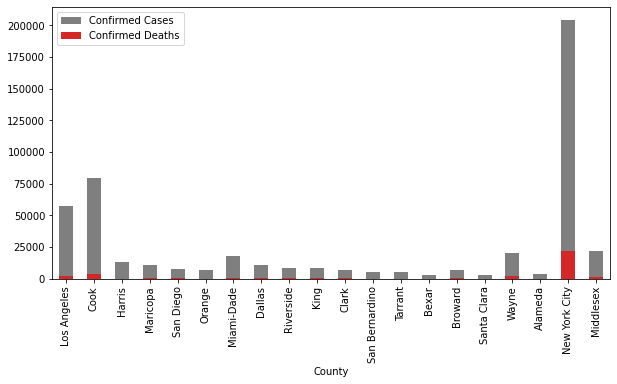

In [15]:
ax = df1.plot(kind='bar', figsize= (10,5), x='County', y='Confirmed Cases', color='C7')
df1.plot(kind='bar', x='County', y='Confirmed Deaths', color='C3', ax=ax)



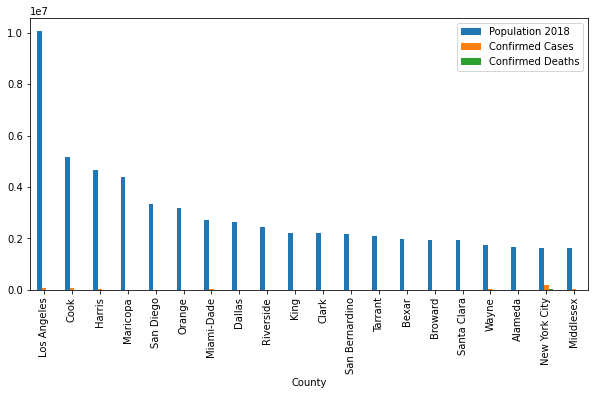

In [16]:
df1.plot(x="County", y=["Population 2018", "Confirmed Cases", "Confirmed Deaths"], kind="bar", figsize= (10,5))


In [17]:
df2= df.sort_values(by='Confirmed Cases', ascending = False).head(20)
df2.head()

,State,County,Population 2018,Poverty 2018 (%),Confirmed Cases,Confirmed Deaths,"Confirmed Cases Per 100,000 people","Deaths Per 100,000 people",Unemployment Rate 2018 (%)
1750,New York,New York City,1629055,15.6,204377,21649,12545.739708,1328.929962,3.7
583,Illinois,Cook,5171960,13.8,79673,3726,1540.479818,72.042321,4.1
190,California,Los Angeles,10073906,14.2,57219,2448,567.992197,24.300405,4.6
1749,New York,Nassau,1357534,5.8,40572,2127,2988.654428,156.681159,3.5
1769,New York,Suffolk,1480830,7.3,39980,1909,2699.837253,128.914190,3.8


In [ ]:
ax = df2.plot(kind='bar', x='County', y='Confirmed Cases', color='C3')
df2.plot(kind='bar', x='County', y='Confirmed Deaths', color='C7', ax=ax)
ax.set_title("Total Cases and Deaths per 100.000 people")

Text(0.5, 1.0, ' First 20 State With the most Confirmed Cases')

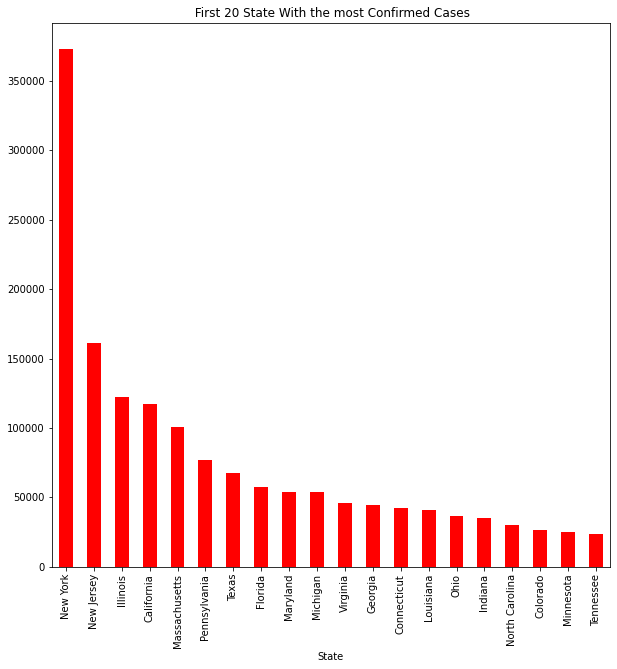

In [19]:
ax = df[df.State != 'Unknown' ].groupby('State')['Confirmed Cases'].sum().sort_values(ascending = False).head(20).plot(kind='bar', color='red', figsize=(10,10))
ax.set_title(" First 20 State With the most Confirmed Cases")

In [20]:
df3= df[df['State'] == 'New York'].head(15)
df3

,State,County,Population 2018,Poverty 2018 (%),Confirmed Cases,Confirmed Deaths,"Confirmed Cases Per 100,000 people","Deaths Per 100,000 people",Unemployment Rate 2018 (%)
1722,New York,Albany,306585,11.3,1900,112,619.730254,36.531468,3.7
1723,New York,Allegany,46332,17.0,48,0,103.600104,0.000000,5.6
1724,New York,Broome,191925,17.3,578,44,301.159307,22.925622,4.9
1725,New York,Cattaraugus,76726,17.1,89,0,115.997185,0.000000,5.3
1726,New York,Cayuga,77121,13.0,93,1,120.589723,1.296664,4.5
1727,New York,Chautauqua,127472,18.3,86,4,67.465796,3.137944,5.0
1728,New York,Chemung,83935,13.5,137,1,163.221540,1.191398,4.6
1729,New York,Chenango,47445,15.1,133,0,280.324586,0.000000,4.7
1730,New York,Clinton,80679,13.2,97,4,120.229552,4.957920,4.4
1731,New York,Columbia,59785,11.7,391,34,654.010203,56.870452,3.3


In [21]:
df3["Population 2018"].sum()

2441197

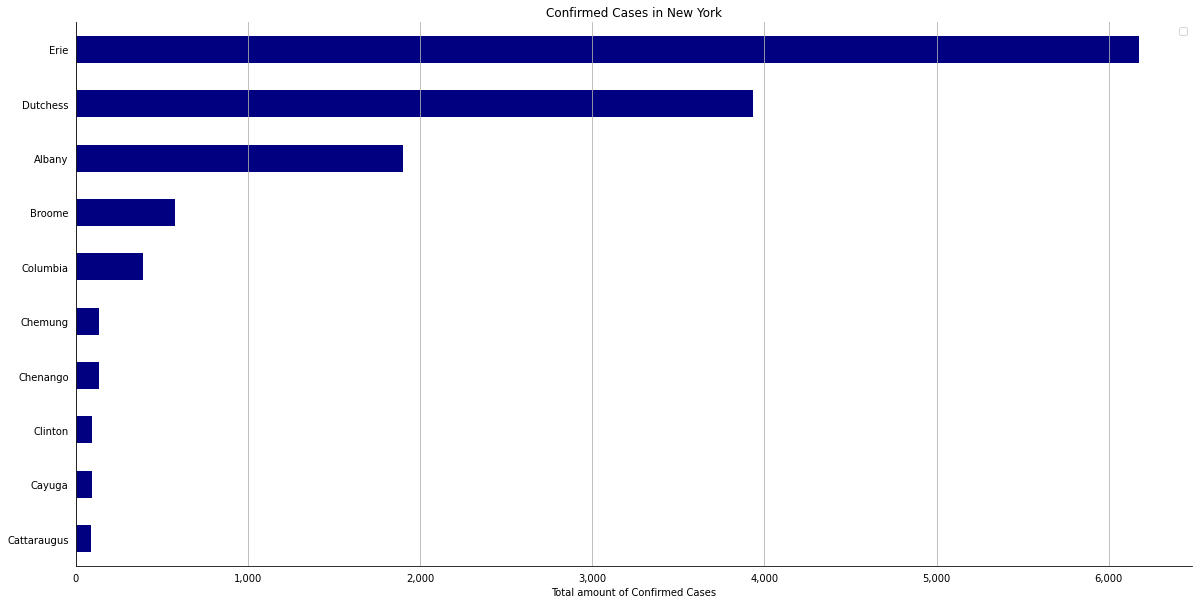

In [22]:
ax = df3.sort_values(by= 'Confirmed Cases').tail(10).plot(x='County', y='Confirmed Cases', kind='barh', color= 'navy', figsize=(20, 10))
ax.set_title("Confirmed Cases in New York")
ax.grid(axis='x')
ax.set_xlabel("Total amount of Confirmed Cases")
ax.xaxis.set_label("This...")
ax.set_ylabel("")
ax.legend('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')